In [1]:
%matplotlib inline
import sys
sys.path.append('../src')
from params import params as P
import numpy as np
import patch_sampling
import cparallel
np.random.seed(1)
P.DATA_LEVEL=0

Loaded configurations from (in order) ['../src/../config/default.ini', '../src/../config/notebook.ini']
OpenCV 2 NOT AVAILABLE, using skimage/scipy.ndimage instead


In [2]:
train_generator, validation_generator = patch_sampling.prepare_sampler()

Loading validation masks


  0%|          | 0/9 [00:00<?, ?it/s]

Done in  1.25816106796
... is done
Loading train masks


100%|██████████| 9/9 [00:01<00:00,  4.16it/s]

Done in  1.63155984879
... is done


In [3]:
reload(cparallel)
X_val = [16]*10
val_gen = cparallel.ContinuousParallelBatchIterator(validation_generator, ordered=False,
                                                batch_size=1,
                                                multiprocess=False,
                                                n_producers=2)
val_gen.append(X_val)
val_gen.start()


Not enough X appended to retrieve this many batches
Returning the maximum amount instead (10)


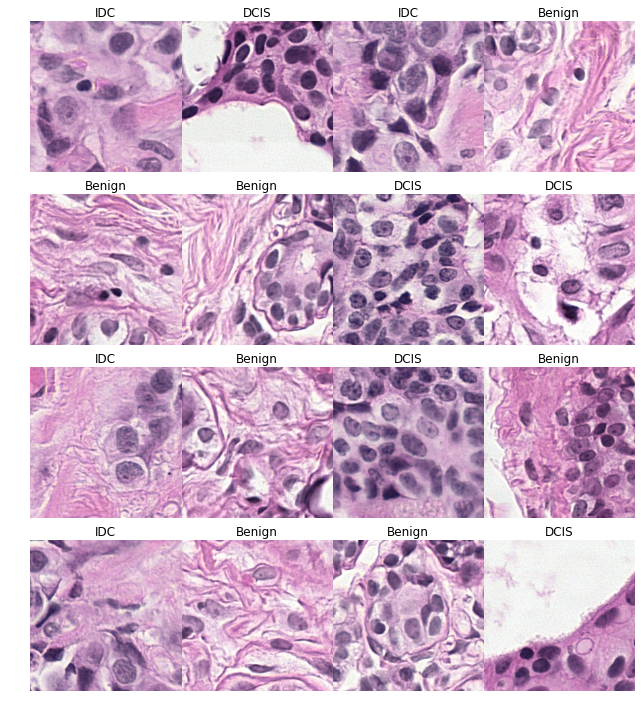

In [4]:
%timeit
from tqdm import tqdm
import matplotlib.pyplot as plt
from dataset import label_name

for b,batch in enumerate(val_gen(11)):
    images, labels = batch

    if b != 0:
        continue

    #Shape into image_number,x,y,color
    im = images.transpose(0,2,3,1)

    im[:,:,:,0] += P.MEAN_PIXEL[0]
    im[:,:,:,1] += P.MEAN_PIXEL[1]
    im[:,:,:,2] += P.MEAN_PIXEL[2]



    f, axarr = plt.subplots(4,4,figsize=(12,12))


    for i in range(16):
        x = i%4
        y = i/4
        axarr[y,x].imshow(im[i])
        axarr[y,x].set_title(label_name(labels[i]))
        axarr[y,x].axis('off')

    plt.subplots_adjust(wspace = -0.3, hspace=0.15)
    plt.show()


In [ ]:
np.random.seed(0)
for batch in val_gen:
    images, labels = batch
    
    
        
    im = images.transpose(0,2,3,1)

    im[:,:,:,0] += P.MEAN_PIXEL[0]
    im[:,:,:,1] += P.MEAN_PIXEL[1]
    im[:,:,:,2] += P.MEAN_PIXEL[2]


    
    f, axarr = plt.subplots(4,4,figsize=(12,12))
    

    for i in range(16):
        x = i%4
        y = i/4
        axarr[y,x].imshow(im[i])
        axarr[y,x].set_title(label_name(labels[i]))
        axarr[y,x].axis('off')

    print np.mean(im)
        
    plt.subplots_adjust(wspace = -0.3, hspace=0.15)
    plt.show()
    